# Analysis of Sonia Gandhi's Interview with Rajdeep Sardesai
The analysis was based on the transcript available on the India Today website
http://indiatoday.intoday.in/story/sonia-gandhi-interview-rajdeep-sardesai-pm-modi-transcript/1/816508.html

In [520]:
import re
import pandas as pd
import numpy as np

#Open and read file , read as 'person : Talk '
f = open('/Users/yashodhanjoglekar/Documents/Sonia_interview', 'r')
strings = re.findall('(\w+)\:(.*)', f.read())
f.close()
 
#Convert to a dataframe and name columns, Count words used , Calculate time / Answer
Interview = pd.DataFrame(strings,columns =['Person','Talk'])
Interview['Count']= Interview['Talk'].apply(lambda x: len(x.split()))
Interview_duration = 37 #In minutes
Interview['Time']= Interview['Count'].apply(lambda x: x*(Interview_duration/Interview['Count'].sum()))

# Check number  of people in the file and get word count
Interview.groupby('Person')['Count','Time'].agg({'count','sum','mean'}).reset_index()

Person Count                        Time                
             sum count       mean        sum count      mean
0  Rajdeep  2292    88  26.045455  18.532343    88  0.210595
1    Sonia  2284    88  25.954545  18.467657    88  0.209860

In [521]:
#Total length of interview was 37 minutes
#Calcuate Cumulative time and CCumulative word count
Interview['Time']= Interview['Count'].apply(lambda x: x*(Interview_duration/Interview['Count'].sum()))
Interview['CumTime'] = Interview.Time.cumsum()
Interview['CumCount'] = Interview[Interview.Person == 'Sonia'].Count.cumsum()
Interview['CumCount2'] = Interview[Interview.Person == 'Rajdeep'].Count.cumsum()
Interview['CumCount'] = Interview['CumCount'].fillna(Interview['CumCount2'])
del Interview['CumCount2']

Interview.head(3)

,Person,Talk,Count,Time,CumTime,CumCount
0,Rajdeep,Hello and welcome to this India Today special...,77,0.622596,0.622596,77.0
1,Sonia,Absolutely and very well. She was in London o...,110,0.889423,1.512019,110.0
2,Rajdeep,She was already the PM at that time!,8,0.064685,1.576705,85.0


In [522]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def tokenize(x):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(x)
    droplist = ['','!',',','?',"'s",'.','..','...','....','.....']
    filtered_sentence = [w for w in word_tokens if not (w in (stop_words) or w in (droplist))]
    return filtered_sentence

Interview['TfCount'] = Interview['Talk'].map(tokenize).apply(lambda x: len(x))
Interview['Talk_filter'] = Interview['Talk'].map(tokenize).apply(lambda x: ' '.join(x))
Interview.head()

,Person,Talk,Count,Time,CumTime,CumCount,TfCount,Talk_filter
0,Rajdeep,Hello and welcome to this India Today special...,77,0.622596,0.622596,77.0,50,Hello welcome India Today special coming court...
1,Sonia,Absolutely and very well. She was in London o...,110,0.889423,1.512019,110.0,62,Absolutely well She London way back New York I...
2,Rajdeep,She was already the PM at that time!,8,0.064685,1.576705,85.0,4,She already PM time
3,Sonia,"No. This was in 1965. So, he had to excuse hi...",44,0.355769,1.932474,154.0,25,No This 1965 So excuse say mother could n't ta...
4,Rajdeep,Why were you frightened to meet Mrs Gandhi??,8,0.064685,1.997159,93.0,5,Why frightened meet Mrs Gandhi


In [523]:
# Check number  of people in the file and get word count and averages
Interview.groupby('Person')['Count','Time','TfCount'].agg({'count','sum','mean'}).reset_index()

Person Count                        Time                 TfCount        \
             sum count       mean        sum count      mean     sum count   
0  Rajdeep  2292    88  26.045455  18.532343    88  0.210595    1228    88   
1    Sonia  2284    88  25.954545  18.467657    88  0.209860    1211    88   

              
        mean  
0  13.954545  
1  13.761364

In [524]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

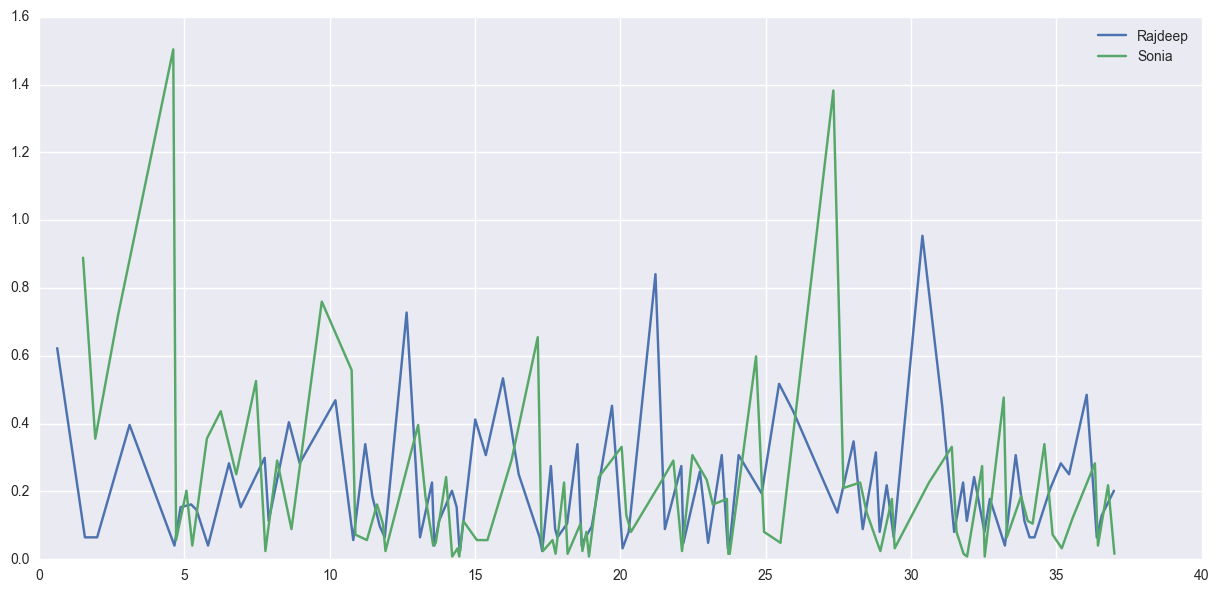

In [525]:
#Words used over time 
groups = Interview.groupby('Person')
fig, ax = plt.subplots(figsize=(15,7))
for person, group in groups:
    ax.plot(group['CumTime'], group['Time'], marker='x', ms=1, label=person)
ax.legend(bbox_to_anchor=(1,1),ncol=1);

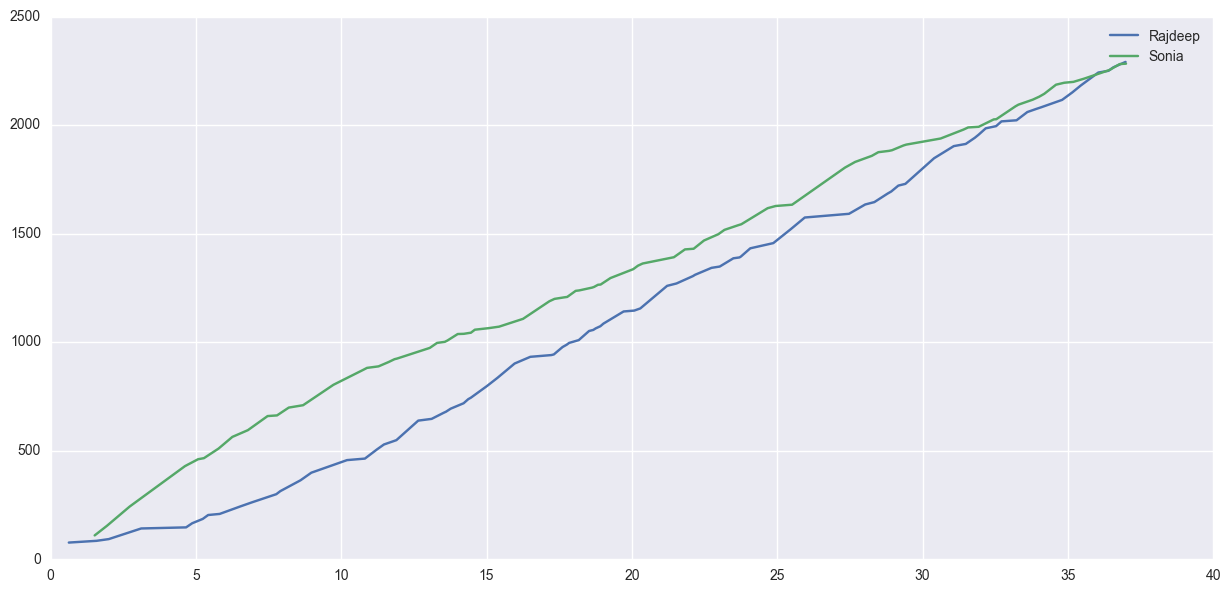

In [526]:
#Cumulative word use over time
groups = Interview.groupby('Person')
fig, ax = plt.subplots(figsize=(15,7))
for person, group in groups:
    ax.plot(group['CumTime'], group['CumCount'], marker='x', ms=1, label=person)
ax.legend(bbox_to_anchor=(1,1),ncol=1);

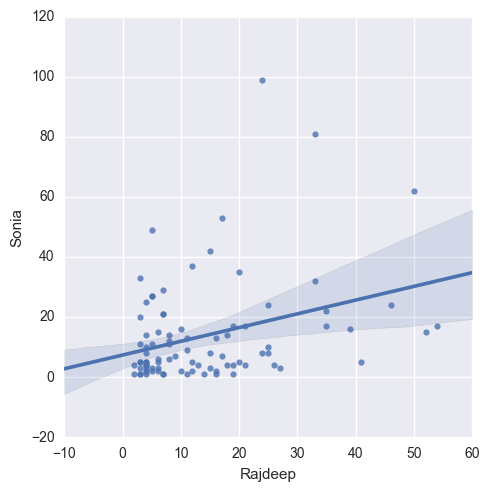

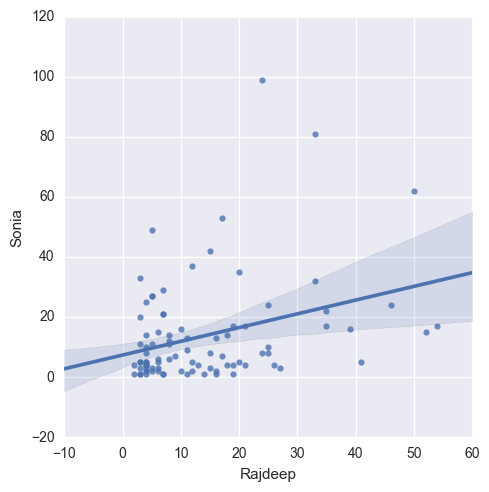

In [527]:
#How did the length of questions relate to length of answers?
df = pd.DataFrame({ 'Rajdeep': range(0, 88  ,1),
                  'Sonia': range(0, 88 ,1) })
i =0
k = 0
while i <= (len(Interview.Person)-1):
    if Interview.loc[i,'Person']== 'Rajdeep' and Interview.loc[i+1,'Person']=='Sonia':
        df.loc[k,'Rajdeep'] = Interview.loc[i,'Count']
        df.loc[k,'Sonia'] = Interview.loc[i+1,'Count']
        df.loc[k,'Rajdeep'] = Interview.loc[i,'TfCount']
        df.loc[k,'Sonia'] = Interview.loc[i+1,'TfCount']
        k+=1
    i+=1

sns.lmplot('Rajdeep','Sonia', data=df, fit_reg = True)
sns.lmplot('Rajdeep','Sonia', data=df, fit_reg = True)

/Users/yashodhanjoglekar/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


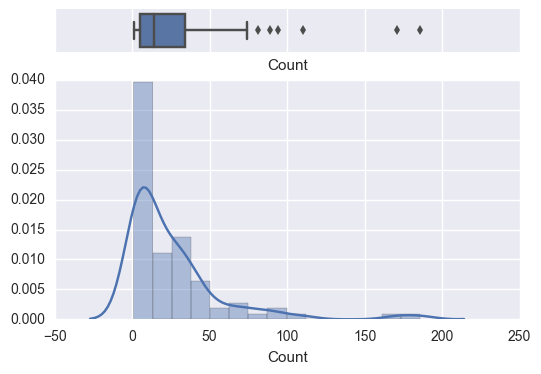

In [343]:
df_filtered = Interview[Interview['Person'] == 'Sonia']
x = df_filtered['Count']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist);

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

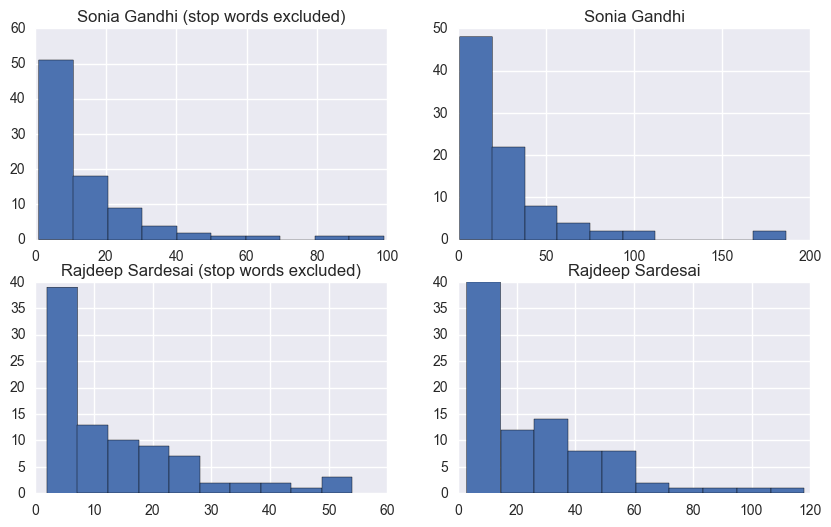

In [556]:
df_filtered_Sonia = Interview[Interview['Person'] == 'Sonia']
df_filtered_Rajdeep = Interview[Interview['Person'] == 'Rajdeep']

fig , ax = plt.subplots(2, 2, figsize=(10,6))

ax[0, 0].hist(df_filtered_Sonia['TfCount'] , bins=10)
ax[0, 0].set_title('Sonia Gandhi (stop words excluded)')

ax[0, 1].hist(df_filtered_Sonia['Count'] , bins=10)
ax[0, 1].set_title('Sonia Gandhi')

ax[1, 0].hist(df_filtered_Rajdeep['TfCount'] , bins=10)
ax[1, 0].set_title('Rajdeep Sardesai (stop words excluded)')

ax[1, 1].hist(df_filtered_Rajdeep['Count'] , bins=10)
ax[1, 1].set_title('Rajdeep Sardesai');

## Answers / Questions with 3 words or less?

In [261]:
#Without Stop Words
Interview1 = Interview[Interview.TfCount <=3]
Interview1.groupby('Person')['Time'].agg({'count'}).reset_index()

,Person,count
0,Rajdeep,7
1,Sonia,21


In [262]:
#With all Words
Interview2 = Interview[Interview.Count <=3]
Interview2.groupby('Person')['Time'].agg({'count'}).reset_index()

,Person,count
0,Rajdeep,2
1,Sonia,17


## Word Frequency

In [528]:
import nltk
from nltk.probability import FreqDist

Sonia_merged = df_filtered_Sonia['Talk_filter'].str.cat(sep=' ').lower()
Rajdeep_merged = df_filtered_Rajdeep['Talk_filter'].str.cat(sep=' ').lower()
All_merged = Interview['Talk_filter'].str.cat(sep=', ').lower()

In [529]:
#Sonia Gandhi's word frequency

fdistSonia = FreqDist()
for sentence in nltk.tokenize.sent_tokenize(Sonia_merged):
     for word in nltk.tokenize.word_tokenize(sentence):
        fdistSonia[word] += 1
        
SoniaWordFrequency= pd.DataFrame(list(fdistSonia.items())).sort_values(by = 1,ascending = False)

#Rajdeep Word Frequency
fdistRajdeep = FreqDist()
for sentence in nltk.tokenize.sent_tokenize(Rajdeep_merged):
     for word in nltk.tokenize.word_tokenize(sentence):
        fdistRajdeep[word] += 1
        
RajdeepWordFrequency= pd.DataFrame(list(fdistRajdeep.items())).sort_values(by = 1,ascending = False)

#Interview Word Frequency
fdistAll = FreqDist()
for sentence in nltk.tokenize.sent_tokenize(All_merged):
     for word in nltk.tokenize.word_tokenize(sentence):
        fdistAll[word] += 1
        
AllWordFrequency= pd.DataFrame(list(fdistAll.items())).sort_values(by = 1,ascending = False)

In [562]:
SearchWord = 'rajiv'
S = SoniaWordFrequency[SoniaWordFrequency[0]== SearchWord]
R = RajdeepWordFrequency[RajdeepWordFrequency[0]== SearchWord]
A = AllWordFrequency[AllWordFrequency[0]== SearchWord]

def SearchF(x):
    if x.empty: return 0
    else : return x.loc[x[0] == SearchWord,1].values[0]

for df, name in zip([S,R,A], ['Sonia','Rajdeep','All']):
    print ('{0} : {1}'.format(name ,SearchF(df)))

Sonia : 6
Rajdeep : 2
All : 8


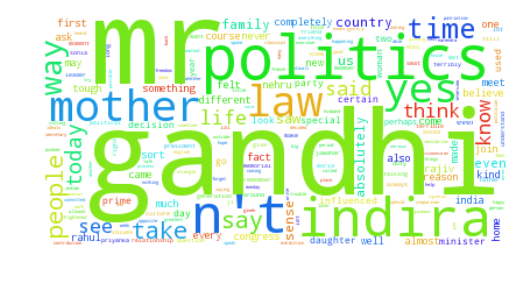

In [564]:
from wordcloud import WordCloud , STOPWORDS

# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=100).generate(All_merged)

# Display the generated image:
# the matplotlib way:
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

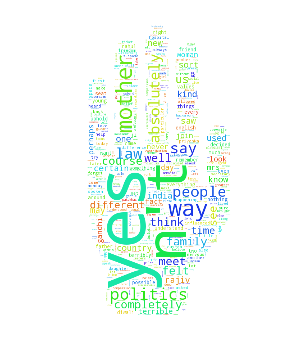

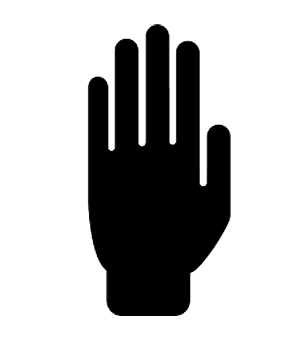

In [569]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS



# Read the whole text.
text = Sonia_merged

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open('/Users/yashodhanjoglekar/Downloads/hand.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# store to file
#wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

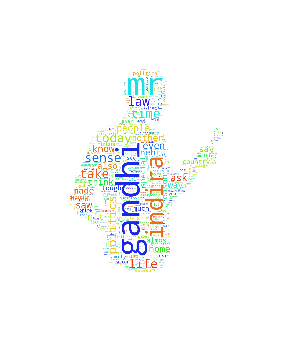

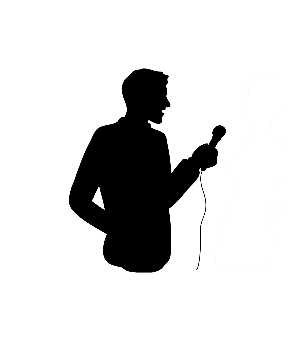

In [571]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS



# Read the whole text.
text = Rajdeep_merged

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open('/Users/yashodhanjoglekar/Downloads/journalist.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# store to file
#wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

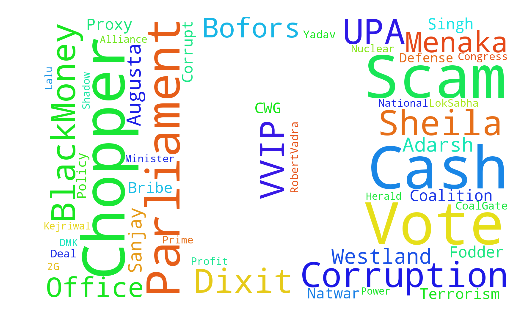

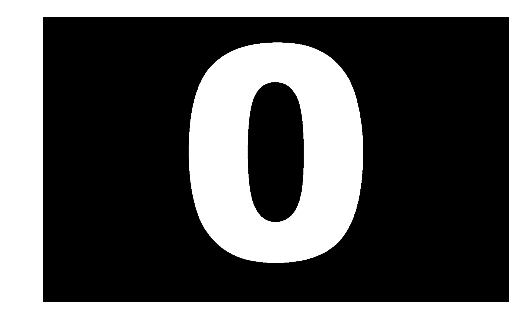

In [591]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS



# Read the whole text.


# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open('/Users/yashodhanjoglekar/Downloads/zeroinv.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# store to file
#wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()